# RGB Image Classification for Color Palette Generation

by Thoai Tran

This notebook explores RGB color information in pixel images. 
We will use an example picture of flowers to illustrate and understand the data within it's image file.

In [1]:
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D as axe
from matplotlib import image as img
import matplotlib.image as img
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import matplotlib
import numpy as np
import turtle
from math import sqrt
import random

try:
    import Image
except ImportError:
    from PIL import Image

This shows the shape of the image with dimensions 638x640 pixels each with 3 color types (r,g,b)

array([110, 105, 112], dtype=uint8)

(638, 640, 3)

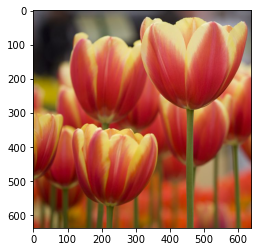

In [2]:
img = img.imread('flowers.jpg')
img[0,0] 
img.shape 

plt.imshow(img)

This loop goes through each pixel of the image to group the r,g,b elements into groups for processing.

In [3]:
r = []
g = []
b = []
for line in img:
    for pixel in line:
        rvalue, gvalue, bvalue = pixel
        r.append(rvalue)
        g.append(gvalue)
        b.append(bvalue)

r[39995:] # [255, 255, 255, 255, 255]
g[9950:9955] # [82, 82, 82, 82, 82]
b[0:5] # [255, 255, 255, 255, 255]

[198,
 194,
 255,
 214,
 196,
 203,
 209,
 214,
 218,
 226,
 224,
 222,
 226,
 245,
 238,
 232,
 226,
 226,
 232,
 234,
 235,
 237,
 237,
 237,
 226,
 213,
 215,
 222,
 221,
 218,
 210,
 209,
 207,
 215,
 219,
 214,
 229,
 229,
 228,
 216,
 214,
 224,
 219,
 215,
 226,
 225,
 223,
 225,
 227,
 231,
 234,
 236,
 236,
 233,
 226,
 223,
 229,
 236,
 236,
 233,
 233,
 232,
 232,
 230,
 231,
 231,
 232,
 233,
 233,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 230,
 231,
 231,
 231,
 231,
 231,
 231,
 231,
 231,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 229,
 230,
 230,
 230,
 230,
 231,
 231,
 232,
 232,
 232,
 232,
 232,
 234,
 234,
 234,
 235,
 234,
 234,
 234,
 236,
 235,
 232,
 229,
 233,
 233,
 233,
 233,
 232,
 231,
 232,
 232,
 233,
 234,
 237,
 238,
 238,
 237,
 235,
 233,
 236,
 233,
 230,
 228,
 229,
 231,
 231,
 231,
 228,
 230,
 232,
 230,
 227,
 226,
 227,
 229,
 228,
 231,
 225,
 221,
 229,
 230,
 222,
 219,
 232,
 240,
 244,
 240,
 235,
 235,
 232,
 225,
 229,
 231

[67, 67, 66, 66, 65]

[112, 113, 113, 113, 115]

This is a visualization of the RGB values of the image in a 3D space.

Text(0.5, 0, '$X = Red$')

Text(0.5, 0, '$Y = Green$')

Text(0.5, 0, '$Z = Blue$')

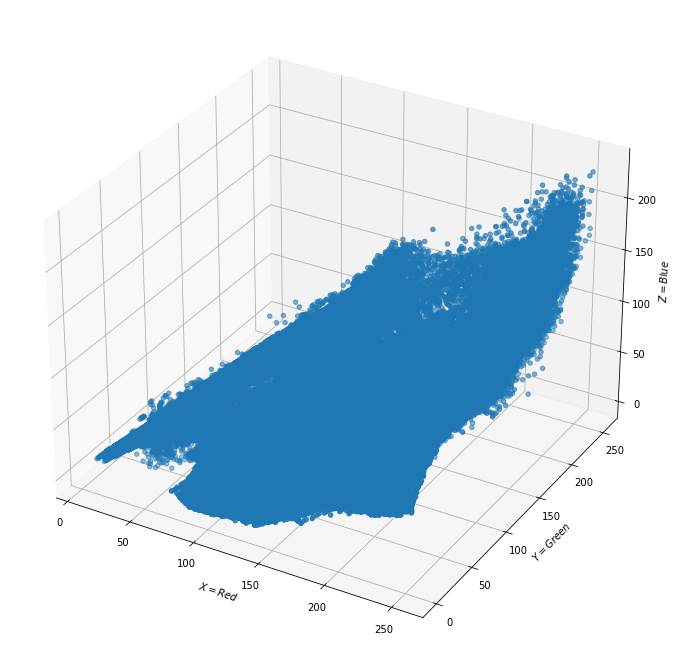

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('$X = Red$')
ax.set_ylabel('$Y = Green$')
ax.set_zlabel('$Z = Blue$') 
ax.scatter(r,g,b)

fig.set_figheight(12)
fig.set_figwidth(16)
plt.show()



This is a data visualization through a pandas dataframe.

In [5]:
df = pd.DataFrame({'red': r, 'green': g, 'blue' : b})
df.sample(5)

,red,green,blue
99104,-59,53,62
407019,-66,64,3
259525,-31,-66,100
276015,-84,49,42
35960,56,51,55


This is a scatter plot of that same data.

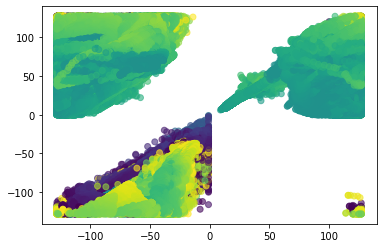

In [6]:
plt.scatter(df.red, df.green, c=df.blue, alpha = 0.6)

We will create points and clusters and use a KMeans machine learning algorithm to find the centroids to output the dominant colors of the image to produce a color palette.

In [7]:
class Point:

    def __init__(self, coordinates):
        self.coordinates = coordinates

In [8]:
class Cluster:

    def __init__(self, center, points):
        self.center = center
        self.points = points


In [9]:
class KMeans:

    def __init__(self, n_clusters, min_diff=1):
        self.n_clusters = n_clusters
        self.min_diff = min_diff

    def calculate_center(self, points):
        n_dim = len(points[0].coordinates)
        vals = [0.0 for i in range(n_dim)]
        for p in points:
            for i in range(n_dim):
                vals[i] += p.coordinates[i]
        coords = [(v / len(points)) for v in vals]
        return Point(coords)

    def assign_points(self, clusters, points):
        plists = [[] for i in range(self.n_clusters)]

        for p in points:
            smallest_distance = float('inf')

            for i in range(self.n_clusters):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i

            plists[idx].append(p)

        return plists

    def fit(self, points):
        clusters = [Cluster(center=p, points=[p]) 
                    for p in random.sample(points, self.n_clusters)]

        while True:

            plists = self.assign_points(clusters, points)

            diff = 0

            for i in range(self.n_clusters):
                if not plists[i]:
                    continue
                old = clusters[i]
                center = self.calculate_center(plists[i])
                new = Cluster(center, plists[i])
                clusters[i] = new
                diff = max(diff, euclidean(old.center, new.center))

            if diff < self.min_diff:
                break

        return clusters

Distance formula to maintain uniform for each point.

In [10]:
def euclidean(p, q):
    n_dim = len(p.coordinates)
    return sqrt(sum([
        (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
    ]))


In [11]:
def get_points(image_path):
    img = Image.open(image_path)
    img.thumbnail((200, 400))
    img = img.convert("RGB")
    w, h = img.size

    points = []
    for count, color in img.getcolors(w * h):
        for _ in range(count):
            points.append(Point(color))

    return points


We translate the data into hexadecimal format and put it in a list to output.

In [12]:
def rgb_to_hex(rgb):
    return '#%s' % ''.join(('%02x' % p for p in rgb))

In [13]:
def get_colors(filename, n_colors=3):
    points = get_points(filename)
    clusters = KMeans(n_clusters=n_colors).fit(points)
    clusters.sort(key=lambda c: len(c.points), reverse=True)
    rgbs = [map(int, c.center.coordinates) for c in clusters]
    return list(map(rgb_to_hex, rgbs))

We can decide how many colors we want to output for the color palette by adjusting the n_colors numeric value.
Below you will see a simple turtle drawing that draws the hexadecimal colors in real time in a pop-up window. Hexadecimal color values are printed.

In [14]:
colors = get_colors('flowers.jpg', n_colors=5)

print(", ".join(colors))

window = turtle.Screen()

image = Image.open('flowers.jpg')
image.show()

turtle.hideturtle()
turtle.speed(0)
turtle.penup()
turtle.setposition(-250, 0)
for i in colors:
    turtle.color(i, i)
    turtle.pensize(5)
    turtle.begin_fill()
    turtle.circle(50)
    turtle.end_fill()
    turtle.penup()
    turtle.forward(120)
    turtle.pendown()

window.exitonclick()


#c15535, #912217, #deb676, #43361f, #817660


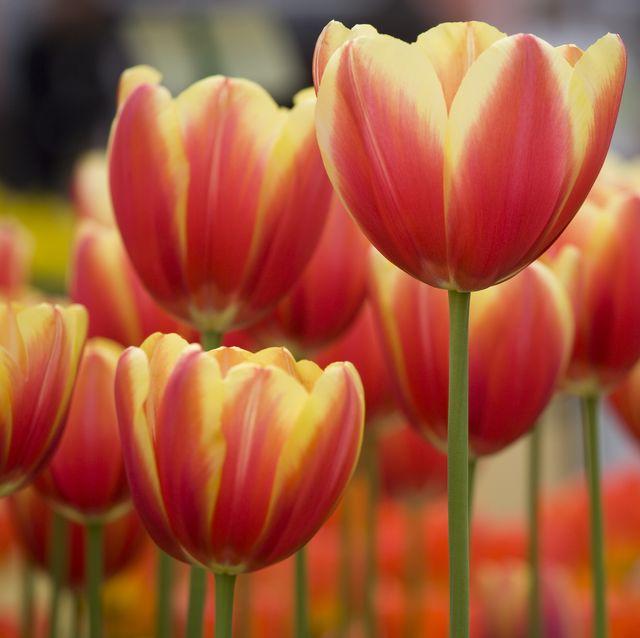

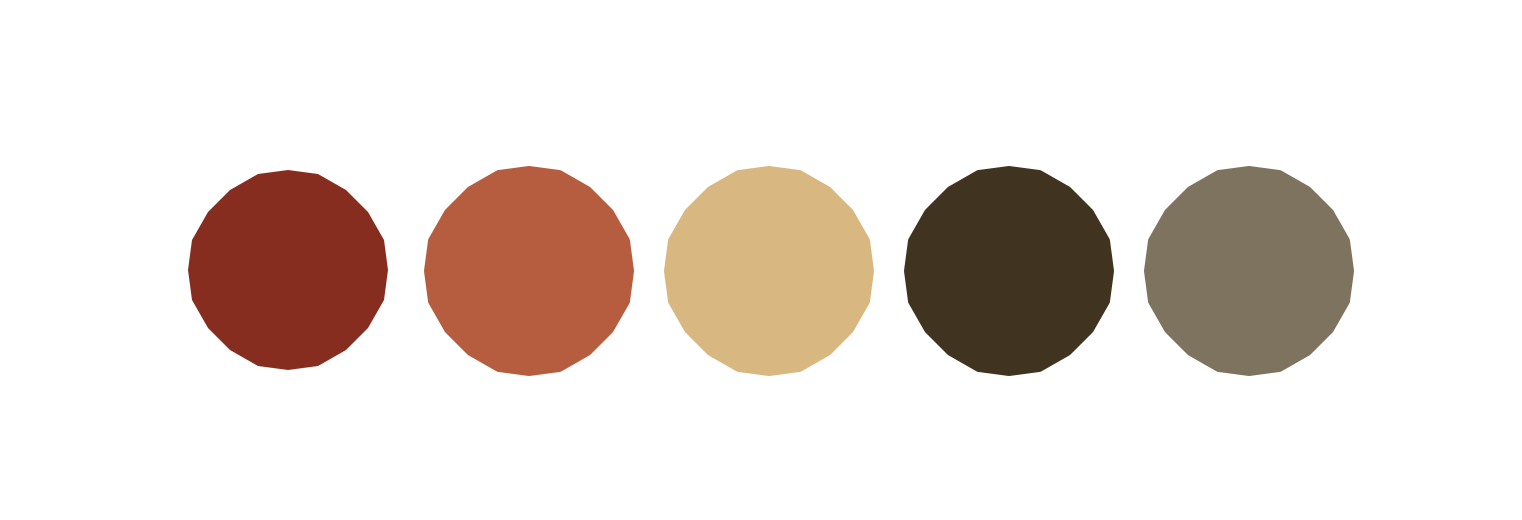

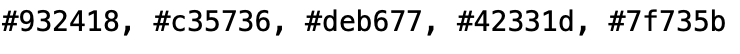

In [15]:
import anvil.server
anvil.server.connect("server_47CLWJI76W43QF3GUHLKACRE-GYIBEZQJSM2FE2WA")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Debug for tommyt323@hotmail.com" as SERVER


In [16]:
import anvil.media

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as filename:

        color = get_colors(filename, n_colors=5)

        return (", ".join(color))
    

Go to https://violet-husky-dormouse.anvil.app/ to use the Color Palette Generator once you connect to the Anvil Server above. Feel free to upload any picture you like and see what colors you get. Colors are generated as a hexadecimal code.

Please note: app will not run until a connection to the Anvil server with jupyter notebook. This is done by running the code in the 2 cells above.

In [20]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p PIL,pandas,numpy,watermark,matplotlib

# date
print (" ")
%watermark -u -n -t -z 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

PIL       : 8.4.0
pandas    : 1.3.4
numpy     : 1.20.3
watermark : 2.3.0
matplotlib: 3.4.3

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 10
Architecture: 64bit

 
Last updated: Fri Apr 15 2022 14:13:45PDT

